In [1]:
# Heat Wave final

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('merged_climate_data.csv')
#print(df.head())

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Tmean'] = (df['tmax'] + df['tmin']) / 2
print(df.head())

        Date  Latitude  Longitude  tmin   tmax  rain   Tmean
0 1990-01-01      24.5       85.5  8.48  21.35   0.0  14.915
1 1990-01-02      24.5       85.5  7.84  20.53   0.0  14.185
2 1990-01-03      24.5       85.5  7.04  20.32   0.0  13.680
3 1990-01-04      24.5       85.5  5.83  20.83   0.0  13.330
4 1990-01-05      24.5       85.5  6.35  22.27   0.0  14.310


In [9]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
grid_normal = df.groupby(['Latitude', 'Longitude','Month', 'Day'])[['tmax','Tmean','tmin']].mean().reset_index()
grid_normal.rename(columns={
    'tmax': 'Tmax_11yr_avg',
    'Tmean': 'Tmean_11yr_avg',
    'tmin': 'Tmin_11yr_avg'
}, inplace=True)
grid_normal = grid_normal.sort_values(by='Latitude', ascending=False)
grid_normal['Date'] = pd.to_datetime(
    '1990-' + grid_normal['Month'].astype(str).str.zfill(2) + '-' + grid_normal['Day'].astype(str).str.zfill(2),
    errors='coerce'  # invalid dates will become NaT
)
print(grid_normal.head())

      Latitude  Longitude  Month  Day  Tmax_11yr_avg  Tmean_11yr_avg  \
7271      25.5       88.5     11   13      29.467590       23.388829   
7283      25.5       88.5     11   25      28.233274       21.610413   
7319      25.5       88.5     12   31      24.159906       17.284565   
7318      25.5       88.5     12   30      24.270687       17.201847   
7317      25.5       88.5     12   29      23.758726       17.023931   

      Tmin_11yr_avg       Date  
7271      17.310068 1990-11-13  
7283      14.987552 1990-11-25  
7319      10.409223 1990-12-31  
7318      10.133006 1990-12-30  
7317      10.289135 1990-12-29  


In [11]:
df_merged = pd.merge(
    df,
    grid_normal,
    on=['Latitude', 'Longitude', 'Month', 'Day'],
    how='left'
)
print(df_merged.tail())

           Date_x  Latitude  Longitude     tmin     tmax   rain     Tmean  \
226455 2020-12-27      21.5       87.5  12.1380  24.6836 -999.0  18.41080   
226456 2020-12-28      21.5       87.5  12.3500  25.2311 -999.0  18.79055   
226457 2020-12-29      21.5       87.5  12.6934  25.6793 -999.0  19.18635   
226458 2020-12-30      21.5       87.5  13.2462  25.5696 -999.0  19.40790   
226459 2020-12-31      21.5       87.5  13.0607  25.2368 -999.0  19.14875   

        Month  Day  Tmax_11yr_avg  Tmean_11yr_avg  Tmin_11yr_avg     Date_y  
226455     12   27      25.012516       19.445642      13.878768 1990-12-27  
226456     12   28      25.231565       19.436437      13.641310 1990-12-28  
226457     12   29      25.410010       19.532976      13.655942 1990-12-29  
226458     12   30      25.433690       19.604358      13.775026 1990-12-30  
226459     12   31      25.566097       19.792656      14.019216 1990-12-31  


In [13]:
df_merged.drop(columns=['Date_y'], inplace=True)
df_merged.rename(columns={'Date_x': 'Date'}, inplace=True)
print(df_merged.head())

        Date  Latitude  Longitude  tmin   tmax  rain   Tmean  Month  Day  \
0 1990-01-01      24.5       85.5  8.48  21.35   0.0  14.915      1    1   
1 1990-01-02      24.5       85.5  7.84  20.53   0.0  14.185      1    2   
2 1990-01-03      24.5       85.5  7.04  20.32   0.0  13.680      1    3   
3 1990-01-04      24.5       85.5  5.83  20.83   0.0  13.330      1    4   
4 1990-01-05      24.5       85.5  6.35  22.27   0.0  14.310      1    5   

   Tmax_11yr_avg  Tmean_11yr_avg  Tmin_11yr_avg  
0      22.935716       16.404200       9.872684  
1      22.469529       16.040152       9.610774  
2      22.261852       15.823739       9.385626  
3      22.602013       15.902658       9.203303  
4      22.595152       15.808877       9.022603  


In [15]:
max_tmax = df_merged['tmax'].max()
print("Maximum tmax value:", max_tmax)
min_tmin = df_merged['tmin'].min()
print("Minimum tmin value:", min_tmin)

Maximum tmax value: 44.9
Minimum tmin value: 2.35


In [17]:
max_row = df_merged.loc[df_merged['tmax'].idxmax()]
print(max_row[['Date', 'Latitude', 'Longitude', 'tmax']])

Date         2012-06-05 00:00:00
Latitude                    21.5
Longitude                   85.5
tmax                        44.9
Name: 121421, dtype: object


In [19]:
min_row = df_merged.loc[df_merged['tmin'].idxmin()]
print(min_row[['Date', 'Latitude', 'Longitude', 'tmin']])

Date         2013-01-09 00:00:00
Latitude                    25.5
Longitude                   85.5
tmin                        2.35
Name: 42378, dtype: object


In [21]:
df_merged['Year'] = df_merged['Date'].dt.year
yearly_max_tmax = df_merged.groupby('Year')['tmax'].max().reset_index()
yearly_min_tmin = df_merged.groupby('Year')['tmin'].min().reset_index()
yearly_max_min_temp = pd.merge(yearly_max_tmax, yearly_min_tmin, on='Year')
yearly_max_min_temp.rename(columns={'tmax': 'Max_Tmax', 'tmin': 'Min_Tmin'}, inplace=True)
yearly_max_min_temp['Max_Tmax'] = yearly_max_min_temp['Max_Tmax'].round(1)
yearly_max_min_temp['Min_Tmin'] = yearly_max_min_temp['Min_Tmin'].round(1)
yearly_max_min_temp['Year'] = yearly_max_min_temp['Year'].astype(int).astype(str)
#print(yearly_max_min_temp)

In [23]:
import matplotlib.pyplot as plt

Table saved as 'yearly_max_min_temperatures.png'


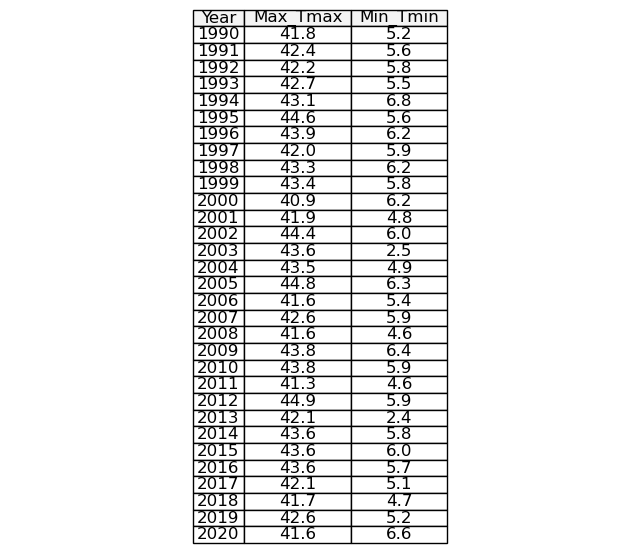

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))

# Hide the axes
ax.axis('off')

# Render the table using pandas' `plot` functionality
table = ax.table(cellText=yearly_max_min_temp.values,
                colLabels=yearly_max_min_temp.columns,
                loc='center',
                cellLoc='center',
                colColours=['#f4f4f4'] * len(yearly_max_min_temp.columns))

# Apply styling to the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(yearly_max_min_temp.columns))))

# Save the table as a PNG file
plt.savefig('yearly_max_min_temperatures.png', bbox_inches='tight', pad_inches=0.05, dpi=300)

# Show a success message
print("Table saved as 'yearly_max_min_temperatures.png'")

In [27]:
import numpy as np

In [29]:
def classify_heatwave(row):
    if row['tmax'] > row['Tmax_11yr_avg'] + 6.5:
        return 'Severe Heatwave'
    elif row['tmax'] > row['Tmax_11yr_avg'] + 4.5:
        return 'Heatwave'
    else:
        return 'No Heatwave'
df_merged['Heatwave'] = df_merged.apply(classify_heatwave, axis=1)
print(df_merged[['Date', 'Latitude', 'Longitude', 'tmax', 'Tmax_11yr_avg', 'Heatwave']].head())

        Date  Latitude  Longitude   tmax  Tmax_11yr_avg     Heatwave
0 1990-01-01      24.5       85.5  21.35      22.935716  No Heatwave
1 1990-01-02      24.5       85.5  20.53      22.469529  No Heatwave
2 1990-01-03      24.5       85.5  20.32      22.261852  No Heatwave
3 1990-01-04      24.5       85.5  20.83      22.602013  No Heatwave
4 1990-01-05      24.5       85.5  22.27      22.595152  No Heatwave


In [31]:
heatwave_count = df_merged.groupby(['Latitude', 'Longitude', 'Year'])['Heatwave'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
heatwave_count.rename(columns={'Heatwave': 'Heatwave_Count', 'Severe Heatwave': 'Severe_Heatwave_Count'}, inplace=True)

# Reset index to view as a clean DataFrame
heatwave_count = heatwave_count.reset_index()

# Display the result
print(heatwave_count)

Heatwave  Latitude  Longitude  Year  Heatwave_Count  No Heatwave  \
0             21.5       85.5  1990               0          365   
1             21.5       85.5  1991               0          365   
2             21.5       85.5  1992               0          366   
3             21.5       85.5  1993               0          365   
4             21.5       85.5  1994               0          365   
..             ...        ...   ...             ...          ...   
615           25.5       88.5  2016               1          365   
616           25.5       88.5  2017               2          363   
617           25.5       88.5  2018               2          363   
618           25.5       88.5  2019               1          364   
619           25.5       88.5  2020               0          366   

Heatwave  Severe_Heatwave_Count  
0                             0  
1                             0  
2                             0  
3                             0  
4            

In [33]:
heatwave_count = df_merged.groupby(['Latitude', 'Longitude', 'Year'])['Heatwave'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
heatwave_count.rename(columns={'Heatwave': 'Heatwave_Count', 'Severe Heatwave': 'Severe_Heatwave_Count'}, inplace=True)

# Reset index for easy plotting
heatwave_count = heatwave_count.reset_index()

# Set up the plotting environment
grid_points = heatwave_count[['Latitude', 'Longitude']].drop_duplicates()

# Plot a bar chart for each grid point

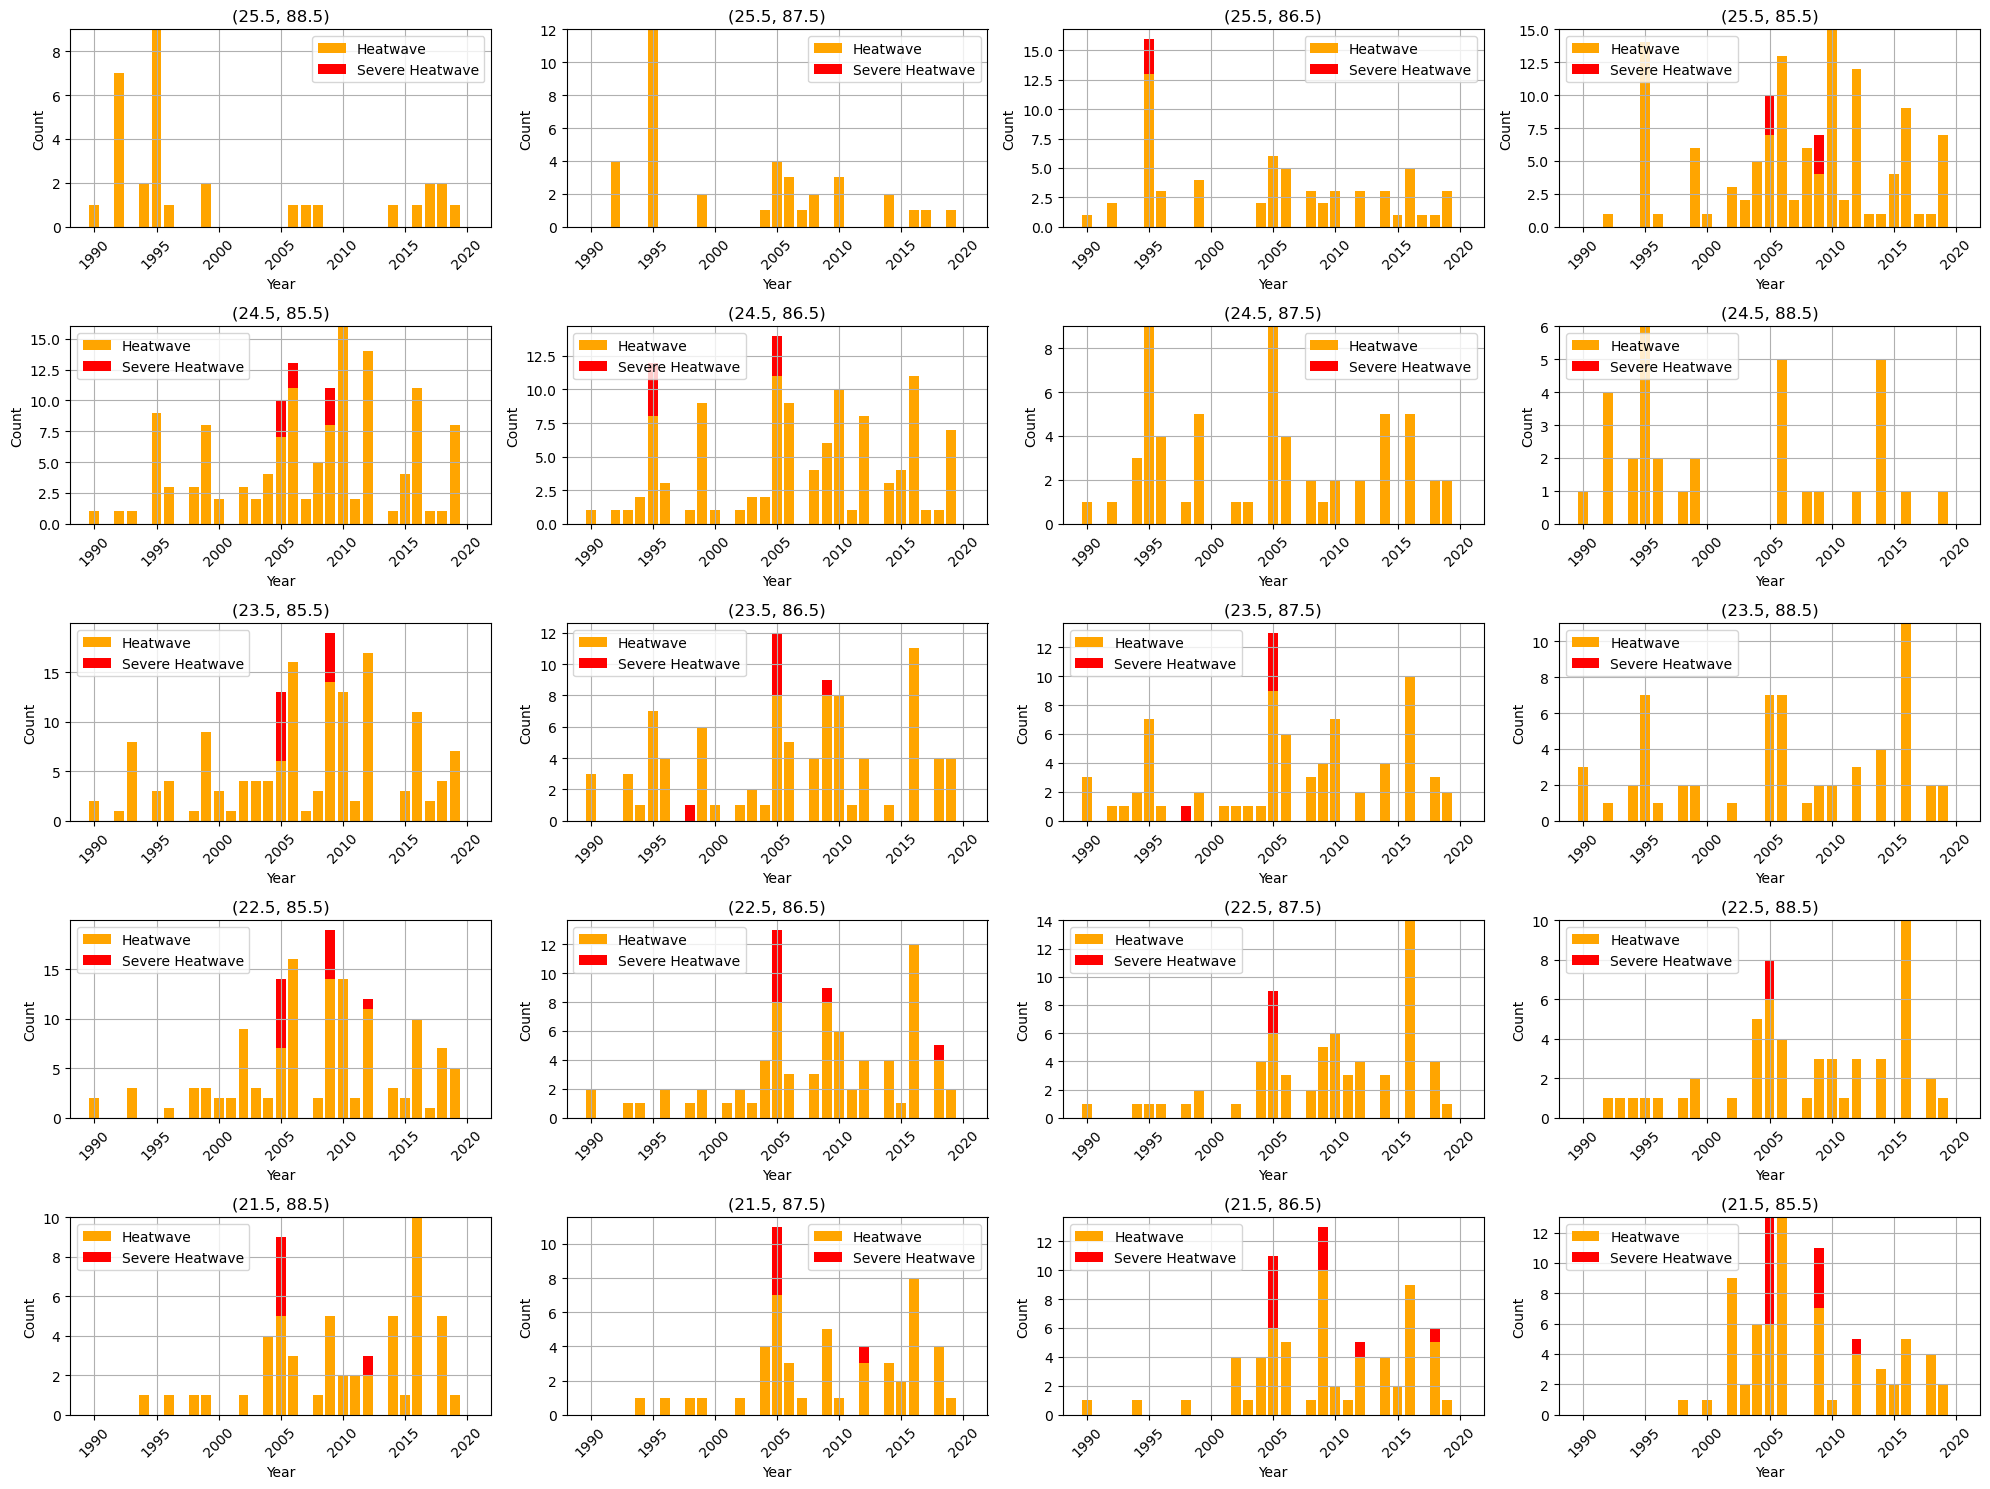

In [35]:
#heatwave_count = heatwave_count.reset_index()
grid_points = heatwave_count[['Latitude', 'Longitude']].drop_duplicates().sort_values(by='Latitude', ascending=False)

# Set up the plotting environment: 4x5 grid
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array to easily iterate

# Set up the grid points (20 grid points)
grid_points = heatwave_count[['Latitude', 'Longitude']].drop_duplicates().sort_values(by='Latitude', ascending=False)
plt.title("Heat Wave analysis")
# Plot a stacked bar chart for each grid point in a single subplot
for idx, grid in enumerate(grid_points.iterrows()):
    grid = grid[1]  # Extract grid info (Latitude, Longitude)
    latitude = grid['Latitude']
    longitude = grid['Longitude']
    
    # Filter the data for the specific grid point
    grid_data = heatwave_count[(heatwave_count['Latitude'] == latitude) & (heatwave_count['Longitude'] == longitude)]
    
    # Get the corresponding axis
    ax = axes[idx]
    ax.bar(grid_data['Year'], grid_data['Heatwave_Count'], color='orange', label='Heatwave')
    
    # Plot Severe Heatwave count bars on top of Heatwave bars (stacked)
    ax.bar(grid_data['Year'], grid_data['Severe_Heatwave_Count'], color='red', bottom=grid_data['Heatwave_Count'], label='Severe Heatwave')

    # Customize chart appearance for each subplot
    ax.set_title(f'({latitude}, {longitude})')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.grid(True)
    ax.legend()

# Adjust layout and display
plt.tight_layout()

plt.show()

In [ ]:
plt.savefig('heatwave_counts.png', dpi=300, bbox_inches='tight')

In [37]:
df_merged = df_merged.sort_values(by=['Latitude', 'Longitude', 'Year', 'Date'])
#print(df_merged.head())
results = []
for (lat, lon, year), group in df_merged.groupby(['Latitude', 'Longitude', 'Year']):
    group = group.reset_index(drop=True)
    
    # Identify streaks of consecutive heatwave days
    group['is_heatwave'] = group['Heatwave'] == 'Heatwave'
    group['group'] = (group['is_heatwave'] != group['is_heatwave'].shift()).cumsum()

    # Filter only heatwave groups
    heatwave_groups = group[group['is_heatwave']].groupby('group')
    
    # Frequency = number of separate heatwave groups
    frequency = heatwave_groups.ngroups
    
    # Duration = total number of heatwave days
    duration = group['is_heatwave'].sum()
    
    # Append result
    results.append({
        'Latitude': lat,
        'Longitude': lon,
        'Year': year,
        'Heatwave_Frequency': frequency,
        'Heatwave_Duration': duration
    })

# Convert to DataFrame
heatwave_stats = pd.DataFrame(results)

# Sort by Latitude (descending) and Longitude
heatwave_stats = heatwave_stats.sort_values(by=['Latitude', 'Longitude', 'Year'], ascending=[False, True, True])

# Show result
print(heatwave_stats.head())

     Latitude  Longitude  Year  Heatwave_Frequency  Heatwave_Duration
496      25.5       85.5  1990                   0                  0
497      25.5       85.5  1991                   0                  0
498      25.5       85.5  1992                   1                  1
499      25.5       85.5  1993                   0                  0
500      25.5       85.5  1994                   0                  0


In [43]:
pip install ipywidgets --upgrade


Note: you may need to restart the kernel to use updated packages.


In [45]:
import ipywidgets as widgets
from IPython.display import display, clear_output


In [47]:
grid_options = heatwave_stats.apply(lambda row: f"Lat: {row['Latitude']}, Lon: {row['Longitude']}", axis=1).tolist()

# Dropdown widget
dropdown = widgets.Dropdown(
    options=grid_options,
    description='Grid:',
    layout=widgets.Layout(width='50%')
)

output = widgets.Output()

def show_table(change):
    with output:
        clear_output()
        selected = dropdown.value
        lat, lon = map(float, selected.replace("Lat: ", "").replace("Lon: ", "").split(","))
        grid_data = heatwave_stats[(heatwave_stats['Latitude'] == lat) & (heatwave_stats['Longitude'] == lon)]

        # Clean display
        display(grid_data[['Year', 'Heatwave_Frequency', 'Heatwave_Duration']].astype(int).style
            .set_caption(f"Heatwave Data for Grid ({lat}, {lon})")
            .set_table_styles([
                {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
                {'selector': 'td', 'props': [('font-size', '11pt'), ('text-align', 'center')]}
            ])
        )
dropdown.observe(show_table, names='value')
display(dropdown, output)

Dropdown(description='Grid:', layout=Layout(width='50%'), options=('Lat: 25.5, Lon: 85.5', 'Lat: 25.5, Lon: 85…

Output()

In [65]:
from IPython.display import display, HTML

# Filter data for the years 2010–2020
filtered_data = heatwave_stats[(heatwave_stats['Year'] >= 2010) & (heatwave_stats['Year'] <= 2020)]

# Rename columns
filtered_data = filtered_data.rename(columns={'Heatwave_Frequency': 'Frequency', 'Heatwave_Duration': 'Duration'})

# Get unique grid points, sorted by Latitude (descending)
unique_grids = filtered_data[['Latitude', 'Longitude']].drop_duplicates().sort_values(by='Latitude', ascending=False).reset_index(drop=True)

# Generate styled tables for each grid point
styled_tables = []
for _, row in unique_grids.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    grid_data = filtered_data[(filtered_data['Latitude'] == lat) & (filtered_data['Longitude'] == lon)]

    styled = grid_data[['Year', 'Frequency', 'Duration']].astype(int).style \
        .set_caption(f"Grid ({lat}, {lon}) [2010–2020]") \
        .set_table_styles([
            {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('font-size', '11pt'), ('text-align', 'center')]}
        ]) \
        .hide(axis='index')

    styled_tables.append(styled.to_html())

# Arrange in 4-column layout with 5 rows
html_rows = []
for i in range(0, len(styled_tables), 4):
    row_html = f"""
    <div style="display: flex; justify-content: space-between; gap: 30px; margin-bottom: 40px;">
        <div style="flex: 1;">{styled_tables[i]}</div>
        <div style="flex: 1;">{styled_tables[i+1] if i+1 < len(styled_tables) else ''}</div>
        <div style="flex: 1;">{styled_tables[i+2] if i+2 < len(styled_tables) else ''}</div>
        <div style="flex: 1;">{styled_tables[i+3] if i+3 < len(styled_tables) else ''}</div>
    </div>
    """
    html_rows.append(row_html)

# Display final layout
display(HTML("".join(html_rows)))


Year,Frequency,Duration
2010,6,15
2011,2,2
2012,5,12
2013,1,1
2014,1,1
2015,2,4
2016,5,9
2017,1,1
2018,1,1
2019,4,7


In [53]:
from IPython.display import display
import pandas as pd

# Remove index display and show tables for all grid points
unique_grids = heatwave_stats[['Latitude', 'Longitude']].drop_duplicates().sort_values(by='Latitude', ascending=False)

for _, row in unique_grids.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    grid_data = heatwave_stats[(heatwave_stats['Latitude'] == lat) & (heatwave_stats['Longitude'] == lon)]

    styled_table = grid_data[['Year', 'Heatwave_Frequency', 'Heatwave_Duration']].astype(int).style \
        .set_caption(f"Heatwave Data for Grid ({lat}, {lon})") \
        .set_table_styles([
            {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('font-size', '11pt'), ('text-align', 'center')]}
        ]) \
        .hide(axis="index")  # Hide row index
    
    display(styled_table)


Year,Heatwave_Frequency,Heatwave_Duration
1990,0,0
1991,0,0
1992,1,1
1993,0,0
1994,0,0
1995,6,14
1996,1,1
1997,0,0
1998,0,0
1999,1,6


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,1
1991,0,0
1992,2,2
1993,0,0
1994,0,0
1995,6,13
1996,3,3
1997,0,0
1998,0,0
1999,3,4


Year,Heatwave_Frequency,Heatwave_Duration
1990,0,0
1991,0,0
1992,1,4
1993,0,0
1994,0,0
1995,3,12
1996,0,0
1997,0,0
1998,0,0
1999,2,2


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,1
1991,0,0
1992,2,7
1993,0,0
1994,1,2
1995,3,9
1996,1,1
1997,0,0
1998,0,0
1999,1,2


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,1
1991,0,0
1992,1,1
1993,1,1
1994,0,0
1995,2,9
1996,3,3
1997,0,0
1998,1,3
1999,2,8


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,1
1991,0,0
1992,1,1
1993,1,1
1994,1,2
1995,4,8
1996,3,3
1997,0,0
1998,1,1
1999,3,9


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,1
1991,0,0
1992,1,1
1993,0,0
1994,1,3
1995,2,9
1996,3,4
1997,0,0
1998,1,1
1999,2,5


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,1
1991,0,0
1992,1,4
1993,0,0
1994,1,2
1995,2,6
1996,2,2
1997,0,0
1998,1,1
1999,1,2


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,2
1991,0,0
1992,1,1
1993,3,8
1994,0,0
1995,1,3
1996,2,4
1997,0,0
1998,1,1
1999,2,9


Year,Heatwave_Frequency,Heatwave_Duration
1990,2,3
1991,0,0
1992,0,0
1993,1,3
1994,1,1
1995,2,7
1996,2,4
1997,0,0
1998,0,0
1999,3,6


Year,Heatwave_Frequency,Heatwave_Duration
1990,2,3
1991,0,0
1992,1,1
1993,1,1
1994,1,2
1995,2,7
1996,1,1
1997,0,0
1998,0,0
1999,1,2


Year,Heatwave_Frequency,Heatwave_Duration
1990,2,3
1991,0,0
1992,1,1
1993,0,0
1994,1,2
1995,2,7
1996,1,1
1997,0,0
1998,1,2
1999,1,2


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,2
1991,0,0
1992,0,0
1993,2,3
1994,0,0
1995,0,0
1996,1,1
1997,0,0
1998,2,3
1999,2,3


Year,Heatwave_Frequency,Heatwave_Duration
1990,2,2
1991,0,0
1992,0,0
1993,1,1
1994,1,1
1995,0,0
1996,1,2
1997,0,0
1998,1,1
1999,1,2


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,1
1991,0,0
1992,0,0
1993,0,0
1994,1,1
1995,1,1
1996,1,1
1997,0,0
1998,1,1
1999,1,2


Year,Heatwave_Frequency,Heatwave_Duration
1990,0,0
1991,0,0
1992,1,1
1993,1,1
1994,1,1
1995,1,1
1996,1,1
1997,0,0
1998,1,1
1999,1,2


Year,Heatwave_Frequency,Heatwave_Duration
1990,0,0
1991,0,0
1992,0,0
1993,0,0
1994,0,0
1995,0,0
1996,0,0
1997,0,0
1998,1,1
1999,0,0


Year,Heatwave_Frequency,Heatwave_Duration
1990,1,1
1991,0,0
1992,0,0
1993,0,0
1994,1,1
1995,0,0
1996,0,0
1997,0,0
1998,1,1
1999,0,0


Year,Heatwave_Frequency,Heatwave_Duration
1990,0,0
1991,0,0
1992,0,0
1993,0,0
1994,1,1
1995,0,0
1996,1,1
1997,0,0
1998,1,1
1999,1,1


Year,Heatwave_Frequency,Heatwave_Duration
1990,0,0
1991,0,0
1992,0,0
1993,0,0
1994,1,1
1995,0,0
1996,1,1
1997,0,0
1998,1,1
1999,1,1
